# Effective Graph Paper
Code to generate "effective_graph example" figure 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image, display
import graphviz
import cana
import math
from cana.boolean_network import BooleanNetwork
from cana.drawing.canalizing_map import draw_canalizing_map_graphviz
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.text import Text
from matplotlib.patches import Circle, Rectangle, RegularPolygon
from matplotlib.collections import PatchCollection
from IPython.display import display, Image, Latex, SVG, HTML
import networkx as nx
from copy import copy

In [3]:
# Graph Example
logic = {
    0 : {'name':r'$x_1$', 'in':[],     'out':[1] },
    1 : {'name':r'$x_2$', 'in':[],     'out':[1] },
    2 : {'name':r'$x_3$', 'in':[],     'out':[1] },
    #3 : {'name':r'$x_3$', 'in':[],     'out':[1] },
    #4 : {'name':r'$x_3$', 'in':[0,1,2,3],   'out':[1,1,0,0, 0,0,0,0, 1,1,0,0, 0,0,0,0]},
    3 : {'name':r'$x_4$', 'in':[0,1,2],   'out':[0,0,0,0, 0,0,1,1]},
}
N = cana.boolean_network.BooleanNetwork(name='A', Nnodes=len(logic), logic=logic)
print(N)

for i,node in enumerate(N.nodes,start=0):
    print("Node:",node)
    print("r_ji: {}".format(node.input_redundancy(mode='input',bound='mean')))
    print("e_ji: {}".format(node.effective_connectivity(mode='input',bound='mean')))
    print("s_ji: {}".format(node.input_symmetry(mode='input',bound='mean')))
    print("")
    print("k_r: {:.3f}".format(node.input_redundancy(mode='node',bound='upper')))
    print("k_e: {:.3f}".format(node.effective_connectivity(mode='node',bound='upper')))
    print("k_s: {:.3f}".format(node.input_symmetry(mode='node',bound='upper')))
    print("LUT")
    print(node.look_up_table())

pos = {}
cx,cy = 1,1
for i,deg in enumerate(np.linspace(0,360,4),start=0):
    r = 1.2
    deg += 135
    x, y = cx+r*math.cos(math.radians(deg)), cy+r*math.sin(math.radians(deg))
    pos[i] = "{:.2f},{:.2f}".format(x,y)
pos[3] = "{:.2f},{:.2f}".format(cx,cy)
print(pos)
SG = N.structural_graph()
EG = N.effective_graph(mode='input', bound='mean')
nx.set_node_attributes(SG, pos, 'pos')
nx.set_node_attributes(EG, pos, 'pos')

<BNetwork(Name='A', N=4, Nodes=['$x_1$', '$x_2$', '$x_3$', '$x_4$'])>
Node: <BNode(name='$x_1$', k=0, inputs=[], state=0, outputs='[1]' constant=True)>
r_ji: [0.0]
e_ji: [1.0]
s_ji: [0.0]

k_r: 0.000
k_e: 1.000
k_s: 0.000
LUT
Empty DataFrame
Columns: [In:, Out:]
Index: []
Node: <BNode(name='$x_2$', k=0, inputs=[], state=0, outputs='[1]' constant=True)>
r_ji: [0.0]
e_ji: [1.0]
s_ji: [0.0]

k_r: 0.000
k_e: 1.000
k_s: 0.000
LUT
Empty DataFrame
Columns: [In:, Out:]
Index: []
Node: <BNode(name='$x_3$', k=0, inputs=[], state=0, outputs='[1]' constant=True)>
r_ji: [0.0]
e_ji: [1.0]
s_ji: [0.0]

k_r: 0.000
k_e: 1.000
k_s: 0.000
LUT
Empty DataFrame
Columns: [In:, Out:]
Index: []
Node: <BNode(name='$x_4$', k=3, inputs=[$x_1$,$x_2$,$x_3$], state=0, outputs='[0,0,0,0,0,0,1,1]' constant=False)>
r_ji: [0.375, 0.375, 1.0]
e_ji: [0.625, 0.625, 0.0]
s_ji: [2.0, 2.0, 0.0]

k_r: 0.583
k_e: 0.417
k_s: 0.444
LUT
   In:  Out:
0  000     0
1  001     0
2  010     0
3  011     0
4  100     0
5  101     0
6  1

In [49]:
# ColorBar
interval = np.linspace(0.0, 0.70, 256)
colors = plt.cm.Greys(interval)
cmap = LinearSegmentedColormap.from_list('custom', colors)
#cmap.set_under('#A90533')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig = plt.figure(figsize=(2,2))
ax = fig.add_axes([0.1, 0.05, 0.11, 0.9])
bounds = [0,0.2,0.4,0.6,0.8,1]
boundaries = np.linspace(0,1,20).tolist()

cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, boundaries=boundaries,
    extend='neither', extendfrac=.15, ticks=bounds, spacing='uniform', orientation='vertical')

#display(fig)
plt.savefig('{path:s}/figure-thaliana/colorbar.svg'.format(path=os.getcwd()),transparent=True)
plt.close()

0 {'label': '$x_1$', 'pos': '0.15,1.85'}
1 {'label': '$x_2$', 'pos': '0.69,-0.16'}
2 {'label': '$x_3$', 'pos': '2.16,1.31'}
3 {'label': '$x_4$', 'pos': '1.00,1.00'}


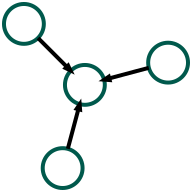

'/Users/rionbr/Sites/CANA/experiments/2018 - Paper/figure-example/SG.svg'

In [57]:
S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', size='3,3', concentrate='false', simplify='false', overlap='false',splines='false',ratio='1')
S.attr('node', pin='true', shape='circle', fixedsize='true', width='.55', color='#00594c', style='filled', fillcolor='#515660', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

for nid,d in SG.nodes(data=True):
    print(nid,d)
    nid = str(nid)
    label = '' #str(d['label'])
    pos = d['pos']
    fillcolor = 'white'
    S.node(nid, label=label, pos=pos, fillcolor=fillcolor)

max_penwidth = 4
for uid,vid,d in SG.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    weight = '{:f}'.format(d['weight']*100)
    penwidth_scaled = '{:.2f}'.format( d['weight']*max_penwidth )
    S.edge(uid, vid, weight=weight, penwidth=penwidth_scaled)
    
display(SVG(S.pipe(format='svg')),metadata={'isolated':True})
# Export
S._format = 'svg'
efile = u"{path:s}/figure-example/SG".format(path=os.getcwd())
S.render(efile, cleanup=True)

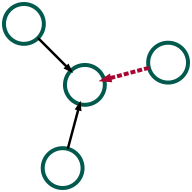

'/Users/rionbr/Sites/CANA/experiments/2018 - Paper/figure-example/EG.svg'

In [59]:
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', size='3,3', concentrate='false', simplify='false', overlap='false',splines='false', ratio='1')
E.attr('node', pin='true', shape='circle', fixedsize='true', width='.55', color='#00594c', style='filled', fillcolor='#515660', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

for nid,d in EG.nodes(data=True):
    nid = str(nid)
    label = '' #str(d['label'])
    pos = d['pos']
    fillcolor = 'white'
    E.node(nid, label=label, pos=pos, fillcolor=fillcolor)

max_penwidth = 4
for uid,vid,d in EG.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    weight = '{:f}'.format(d['weight']*100)
    penwidth = '%.2f' % ( d['weight']*max_penwidth )
    if d['weight'] > 0:
        rgb = cmap(d['weight'])
        hex = mpl.colors.rgb2hex(rgb)
        E.edge(uid,vid, weight=weight, penwidth=penwidth)
    else:
        E.edge(uid,vid, style='dashed', color='#A90533')
    
display(SVG(E.pipe(format='svg')),metadata={'isolated':True})
# Export
E._format = 'svg'
efile = u"{path:s}/figure-example/EG".format(path=os.getcwd())
E.render(efile, cleanup=True)

In [99]:
def plot_look_up_table(nid, n):
    # Init values from BooleanNode
    k = n.k if n.k>=1 else 1
    inputs = n.inputs if not n.constant else [n.name]
    LUT = n.look_up_table().sort_index(ascending=False)
    # Count number of F in the LUT
    n_fs = LUT.shape[0]
    # Schemata Cell Width and spacing
    cwidth = 60.
    cxspace = 0
    cyspace = 6
    border = 1
    sepcxspace = 21
    sepcyspace = 15
    dpi = 150.
    # Margins
    top, right, bottom, left, hs = 120, 25, 25, 60, 25
    # Axes Width & Height
    ax1width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax1height = (n_fs*(cwidth+cyspace)-cyspace)
    # Figure Width & Height
    fwidth = (left + ax1width + hs + right)
    fheight = (bottom + ax1height + top)
    # Percentages for Axes location
    _ax1w = ((ax1width*100) / fwidth) / 100
    _ax1h = ((ax1height*100) / fheight) / 100
    _bottom = ((bottom*100) / fheight) / 100
    _left = ((left*100) / fwidth) / 100
    _hs = ((hs*100) / fwidth) / 100
    # Init Figure
    fig = plt.figure(figsize=(fwidth/dpi,fheight/dpi), facecolor='w', dpi=dpi)
    ax1 = fig.add_axes((_left,_bottom,_ax1w,_ax1h), aspect=1, label='LUT')

    ### LUT Plot ###

    yticks = []
    patches = []
    x,y = 0.,0.
    #
    for i,r in LUT.iterrows():
        ins = str(r['In:'])
        out = r['Out:']
        x = 0.
        xticks = []
        for input in ins:
            if input == '0':
                facecolor = 'white'
                textcolor = 'black'
            elif input == '1':
                facecolor = 'black'
                textcolor = 'white'      
            text = '%s'%(input)
            ax1.add_artist(Text(x+cwidth/2,y+cwidth/10*4, text=text, color=textcolor, va='center', ha='center',fontsize=14,family='serif'))
            r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor=facecolor, edgecolor='black')
            patches.append(r)
            xticks.append(x+cwidth/2)
            x += cwidth + cxspace

        x += sepcxspace
        r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor='black' if (out==1) else 'white', edgecolor='black')
        ax1.add_artist(Text(x-(sepcxspace/2)-(cxspace/2),y+cwidth/10*5, text=':', color='black', va='center', ha='center',fontsize=14,weight='bold',family='serif'))
        ax1.add_artist(Text(x+(cwidth/2),y+cwidth/10*4, text=out, color='white' if (out==1) else 'black', va='center', ha='center',fontsize=14,family='serif'))
        patches.append(r)
        xticks.append(x+cwidth/2)
        yticks.append(y+cwidth/2)
        y += cwidth + cyspace

        #y += sepcyspace

    ax1.add_collection(PatchCollection(patches,match_original=True))
    #
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([r"$f_{%d}$"%(i+1) for i in range(n_fs)[::-1]], fontsize=14)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(inputs + ['%s'%(n.name)], rotation=0, fontsize=14)
    #
    ax1.xaxis.tick_top()
    # Remove Tick
    ax1.tick_params(which='major',pad=7)
    for tic in ax1.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax1.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    # Remove Border
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    # Limits
    ax1.set_xlim(-border,ax1width+border)
    ax1.set_ylim(-border,ax1height+border)
    #ax1.invert_yaxis() 

    # FileName
    filename = n.name
    filename = filename.replace('/','_')
    filename = filename.replace(',','_')
    
    ## Display
    display(fig)
    
    ## Save to file
    plt.savefig('{path:s}/figure-example/LUT-{nid:d}.svg'.format(path=os.getcwd(), nid=nid),
                dpi=dpi, transparent=True)
    
    plt.close()

3 <BNode(name='$x_4$', k=3, inputs=[$x_1$,$x_2$,$x_3$], state=0, outputs='[0,0,0,0,0,0,1,1]' constant=False)>


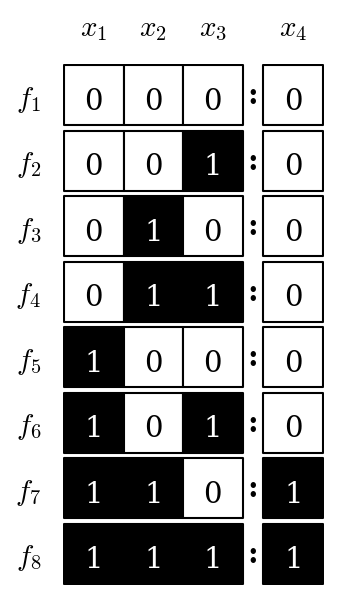

In [100]:
nid = 3
node = N.nodes[nid]
print(nid,node)
plot_look_up_table(nid,N.nodes[nid])

In [101]:
def plot_schemata(nid, n):
    # Init values from BooleanNode
    k = n.k if n.k>=1 else 1
    inputs = n.inputs if not n.constant else [n.name]
    pi0s,pi1s = n._prime_implicants
    ts0s,ts1s = n._two_symbols
    # Count number of PI and TS
    n_pi = sum(len(pis) for pis in [pi0s,pi1s])
    n_ts = sum(len(tss) for tss in [ts0s,ts1s])
    # Schemata Cell Width and spacing
    cwidth = 60.
    cxspace = 0
    cyspace = 6
    border = 1
    sepcxspace = 21
    sepcyspace = 15
    dpi = 150.
    # Margins
    top, right, bottom, left, hs = 160, 25, 25, 60, 90
    # Axes Width & Height
    ax1width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax1height = (n_pi*(cwidth+cyspace)+sepcyspace-cyspace)
    ax2width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax2height = (n_ts*(cwidth+cyspace)+sepcyspace-cyspace)
    # Figure Width & Height
    fwidth = (left + ax1width + hs + ax2width + right)
    fheight = (bottom + max(ax1height,ax2height) + top)
    # Percentages for Axes location
    _ax1w = ((ax1width*100) / fwidth) / 100
    _ax2w = ((ax2width*100) / fwidth) / 100
    _ax1h = ((ax1height*100) / fheight) / 100
    _ax2h = ((ax2height*100) / fheight) / 100
    _bottom = ((bottom*100) / fheight) / 100
    _left = ((left*100) / fwidth) / 100
    _hs = ((hs*100) / fwidth) / 100
    # Init Figure
    fig = plt.figure(figsize=(fwidth/dpi,fheight/dpi), facecolor='w', dpi=dpi)
    ax1 = fig.add_axes((_left,_bottom,_ax1w,_ax1h), aspect=1, label='PI')

    ### PI Plot ###

    yticks = []
    patches = []
    x,y = 0.,0.
    #
    for out,pis in zip([1,0],[pi1s,pi0s]):
        for pi in pis:
            x = 0.
            xticks = []
            for input in pi:
                if input == '0':
                    facecolor = 'white'
                    textcolor = 'black'
                elif input == '1':
                    facecolor = 'black'
                    textcolor = 'white'
                elif input == '2':
                    facecolor = '#cccccc'
                    textcolor = 'black'            
                text = '%s'%(input) if (input!='2') else '#'
                ax1.add_artist(Text(x+cwidth/2,y+cwidth/10*4, text=text, color=textcolor, va='center', ha='center',fontsize=14,family='serif'))
                r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor=facecolor, edgecolor='black')
                patches.append(r)
                xticks.append(x+cwidth/2)
                x += cwidth + cxspace

            x += sepcxspace
            r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor='black' if (out==1) else 'white', edgecolor='black')
            ax1.add_artist(Text(x-(sepcxspace/2)-(cxspace/2),y+cwidth/10*4, text=':', color='black', va='center', ha='center',fontsize=14,weight='bold',family='serif'))
            ax1.add_artist(Text(x+(cwidth/2),y+cwidth/10*4, text=out, color='white' if (out==1) else 'black', va='center', ha='center',fontsize=14,family='serif'))
            patches.append(r)
            xticks.append(x+cwidth/2)
            yticks.append(y+cwidth/2)
            y += cwidth + cyspace
        y += sepcyspace

    ax1.add_collection(PatchCollection(patches,match_original=True))
    #
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([r"$f^{'}_{%d}$"%(i+1) for i in range(n_pi)[::-1]], fontsize=14)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(inputs + ['%s'%(n.name)], rotation=0, fontsize=14)
    #
    ax1.xaxis.tick_top()
    # Remove Tick
    ax1.tick_params(which='major',pad=7)
    for tic in ax1.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax1.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    # Remove Border
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    # Limits
    ax1.set_xlim(-border,ax1width+border)
    ax1.set_ylim(-border,ax1height+border)


    # FileName
    filename = n.name.replace('/','_')
    filename = filename.replace(',','_')
    
    ## Display ##
    display(fig)
    
    ## Save to file
    plt.savefig('{path:s}/figure-example/SCH-{nid:d}.svg'.format(path=os.getcwd(), nid=nid),
                dpi=dpi, transparent=True)
    
    plt.close()

3 <BNode(name='$x_4$', k=3, inputs=[$x_1$,$x_2$,$x_3$], state=0, outputs='[0,0,0,0,0,0,1,1]' constant=False)>


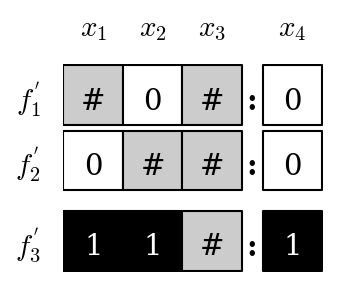

In [102]:
nid = 3
node = N.nodes[nid]
print(nid,node)
plot_schemata(nid,N.nodes[nid])